In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("Evaluation_Results.json", "r") as f:
    results = json.load(f)

In [3]:
iterations = [entry["iteration"] for entry in results]
fid_scores = np.array([entry["fid_score"] for entry in results])
lpips_scores = np.array([entry["lpips_score"] for entry in results])
fooling_rates = np.array([entry["fooling_rate"] for entry in results])

In [6]:
list(fid_scores)

[np.float64(308.2965374409523),
 np.float64(255.33761892936423),
 np.float64(250.87418442480055),
 np.float64(273.4083291581493),
 np.float64(271.1610365892304),
 np.float64(281.9459934264494),
 np.float64(275.57386695112353),
 np.float64(276.269771316297),
 np.float64(275.7495347561158),
 np.float64(275.8755402625103),
 np.float64(297.45037382756334)]

In [4]:
fid_min, fid_max = fid_scores.min(), fid_scores.max()
fid_scores_normalized = (fid_scores - fid_min) / (fid_max - fid_min) if fid_max != fid_min else fid_scores

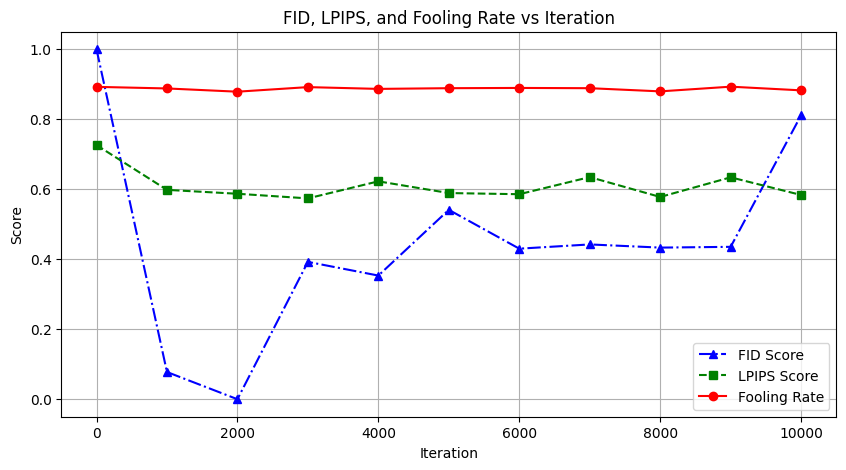

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(iterations, fid_scores_normalized, marker='^', linestyle='-.', label="FID Score", color='blue')
plt.plot(iterations, lpips_scores, marker='s', linestyle='--', label="LPIPS Score", color='green')
plt.plot(iterations, fooling_rates, marker='o', linestyle='-', label="Fooling Rate", color='red')

plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("FID, LPIPS, and Fooling Rate vs Iteration")
plt.legend()
plt.grid(True)

plt.show()